In [24]:
from gensim.models import Phrases
from gensim.models.word2vec import LineSentence
import pandas as pd

In [25]:
data = pd.read_csv("treino.csv")

In [26]:
import itertools as it
import spacy
nlp = spacy.load("pt_core_news_sm")
from spacy.lang.pt.stop_words import STOP_WORDS

In [27]:
import os
import codecs

In [28]:
data.head()

,title,text,date,category,subcategory,link
0,"Após polêmica, Marine Le Pen diz que abomina n...",A candidata da direita nacionalista à Presidên...,2017-04-28,mundo,NaN,http://www1.folha.uol.com.br/mundo/2017/04/187...
1,"Macron e Le Pen vão ao 2º turno na França, em ...",O centrista independente Emmanuel Macron e a d...,2017-04-23,mundo,NaN,http://www1.folha.uol.com.br/mundo/2017/04/187...
2,"Apesar de larga vitória nas legislativas, Macr...",As eleições legislativas deste domingo (19) na...,2017-06-19,mundo,NaN,http://www1.folha.uol.com.br/mundo/2017/06/189...
3,"Governo antecipa balanço, e Alckmin anuncia qu...",O número de ocorrências de homicídios dolosos ...,2015-07-24,cotidiano,NaN,http://www1.folha.uol.com.br/cotidiano/2015/07...
4,"Após queda em maio, a atividade econômica sobe...","A economia cresceu 0,25% no segundo trimestre,...",2017-08-17,mercado,NaN,http://www1.folha.uol.com.br/mercado/2017/08/1...


In [29]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context="notebook", style="darkgrid", palette="deep", font="sans-serif", font_scale=1, color_codes=True)
import nltk
from nltk import word_tokenize
from nltk import ngrams
import warnings
warnings.filterwarnings("ignore")

In [72]:
datas = data.date.unique()

In [97]:
data.date =data.date.astype('string')

In [115]:
def outputa(data,num,title=None):
    geral=pd.DataFrame()
    for anomes in datas:
        data_da_vez= data.query(f"date =='{anomes}'")['text']
        token_data= []
        tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
        for i in data_da_vez:
            n_grams = ngrams(tokenizer.tokenize(i), num)
            p = [ ' '.join(grams) for grams in  n_grams]
            token_data.append(p)
        corpus = []
        for i in token_data:
            for j in i:
                corpus.append(j)
        c = Counter(corpus)
        Di = dict(c)
        top_100 = dict(heapq.nlargest(100, Di.items(), key=itemgetter(1)))
        temp = pd.DataFrame({"ngrams":top_100.keys(),"count":top_100.values()})
        temp['anomesdia'] = anomes 
        geral = pd.concat([geral,temp])
    return geral

In [30]:
def Ngram(data,num,title=None):
    token_data= []
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
    for i in data:
        n_grams = ngrams(tokenizer.tokenize(i), num)
        p = [ ' '.join(grams) for grams in  n_grams]
        token_data.append(p)
    corpus = []
    for i in token_data:
        for j in i:
            corpus.append(j)
    c = Counter(corpus)
    Di = dict(c)
    TOp_50 = dict(heapq.nlargest(50, Di.items(), key=itemgetter(1)))
    
    fig = plt.figure(1, figsize=(12, 12))
    plt.bar(range(len(TOp_50)),TOp_50.values(),align='center')        
    plt.xticks(range(len(TOp_50)), list(TOp_50.keys()))
    plt.tick_params(axis="x",rotation=90) 
    
    if title == None:
        plt.title("Ngram")
    else:
        plt.title(title)

In [32]:
import heapq
from operator import itemgetter
from collections import Counter

In [ ]:
'eu quero negociar' , 

In [ ]:
'eu quero negociar' : [Dívida : 0.80,
                       cartão: 0.1,
                       Boleto : 0.05,
                       ]
"Eu não vou pagar" : [Dívida,
                      Boleto]

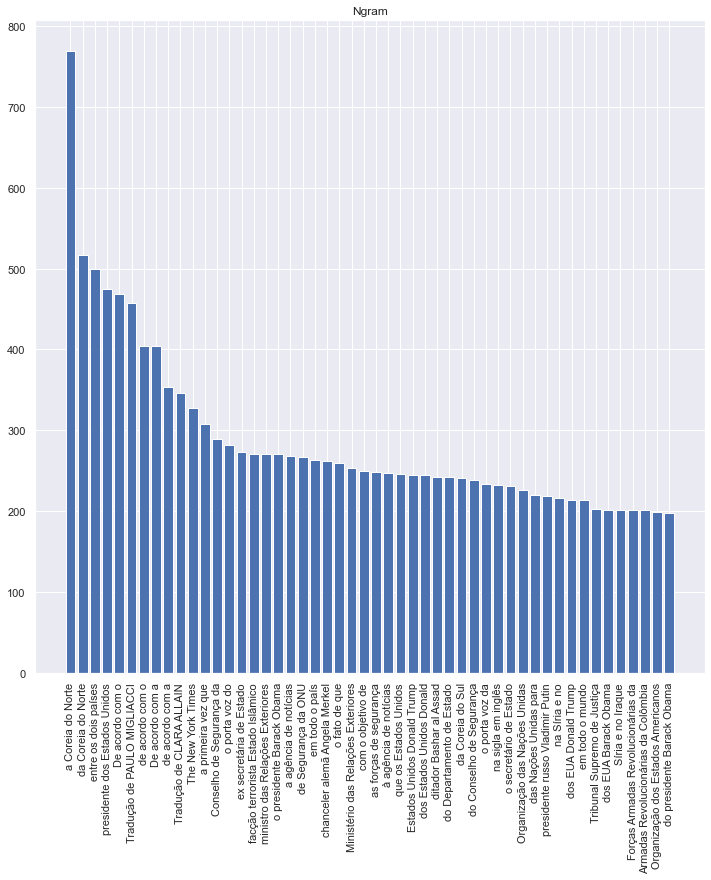

In [65]:
Ngram(data.query("category=='mundo'")['text'],4)

In [119]:
resultado = outputa(data,3)

In [132]:
q = resultado.groupby('ngrams')
q.columns =['ngrams','anomesdia']

In [134]:
q.sort_values('anomesdia',ascending=False)

,ngrams,anomesdia
11774,de São Paulo,978
2498,De acordo com,904
15336,em São Paulo,865
11850,de acordo com,850
7842,acordo com o,698
...,...,...
9908,conferência Atlantic Dialogues,1
9907,condução coercitiva do,1
9906,condições dos credores,1
9905,condições dos contratos,1


In [145]:
ngrams_s= resultado.groupby('ngrams')['count'].sum().reset_index().query("count>500")['ngrams'].values

In [171]:
ngrams_s = ngrams_s[1:]

In [151]:
from sklearn.linear_model import LinearRegression

In [174]:
resultado.head(1)

,ngrams,count,anomesdia
0,sexta feira 28,33,2017-04-28


In [177]:
total = pd.DataFrame()
for ngram in ngrams_s:
    temp =resultado.query(f"ngrams=='{ngram}'")
    temp = temp.sort_values("anomesdia").reset_index(drop=True).reset_index()
    temp.columns =['ordem','ngrams','count','anomesdia']
    ajustado = temp[['ordem','count']]
    lr = LinearRegression()
    lr.fit(ajustado[['ordem']],ajustado[['count']])
    valor = lr.coef_[0][0]
    tu = pd.DataFrame({"ngram":[ngram],"valor":[valor]})
    total = pd.concat([total,tu])

In [179]:
total.sort_values("valor",ascending=False)

,ngram,valor
0,Rock in Rio,0.168671
0,reforma da Previdência,0.026921
0,Coreia do Sul,0.023354
0,quartas de final,0.016149
0,em relação à,0.015793
...,...,...
0,nesta terça feira,-0.038110
0,o Reino Unido,-0.039539
0,completo no blog,-0.063585
0,post completo no,-0.063585


<AxesSubplot:xlabel='anomesdia'>

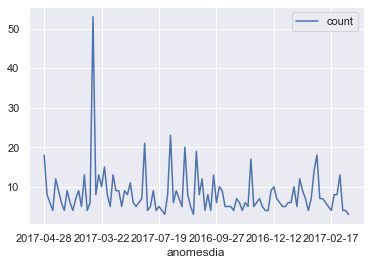

In [183]:
resultado.query("ngrams=='reforma da Previdência'").plot(x='anomesdia',y='count')

<AxesSubplot:xlabel='ordem'>

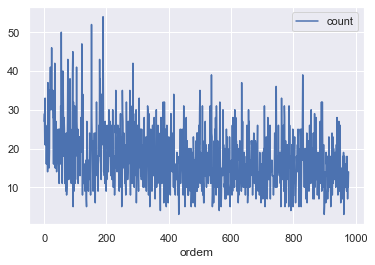

In [160]:
ajustado.plot(x='ordem',y='count')

In [161]:
u

,ordem,ngrams,count,anomesdia
0,0,de São Paulo,27,2015-01-01
1,1,de São Paulo,29,2015-01-02
2,2,de São Paulo,21,2015-01-03
3,3,de São Paulo,33,2015-01-04
4,4,de São Paulo,21,2015-01-05
...,...,...,...,...
973,973,de São Paulo,12,2017-09-27
974,974,de São Paulo,7,2017-09-28
975,975,de São Paulo,12,2017-09-29
976,976,de São Paulo,10,2017-09-30
